# Importing Necessary Libraris

In [2]:
import os
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
import skimage
import cv2

# image preproccing

In [3]:
## Image preprocessing------------------
data_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'

img_size = (100, 100)

preprocessed_folder_path = 'preprocessed_images2'
if not os.path.exists(preprocessed_folder_path):
    os.mkdir(preprocessed_folder_path)

for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    category_folder_path = os.path.join(preprocessed_folder_path, folder)
    
    if not os.path.exists(category_folder_path):
        os.mkdir(category_folder_path)
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        
        if image is not None:
            resized_image = cv2.resize(image, img_size)
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            resized_image = cv2.resize(gray_image, img_size)
            normalized_image = cv2.equalizeHist(resized_image)
            preprocessed_image_path = os.path.join(category_folder_path, filename)
            cv2.imwrite(preprocessed_image_path, normalized_image)

## printing original images


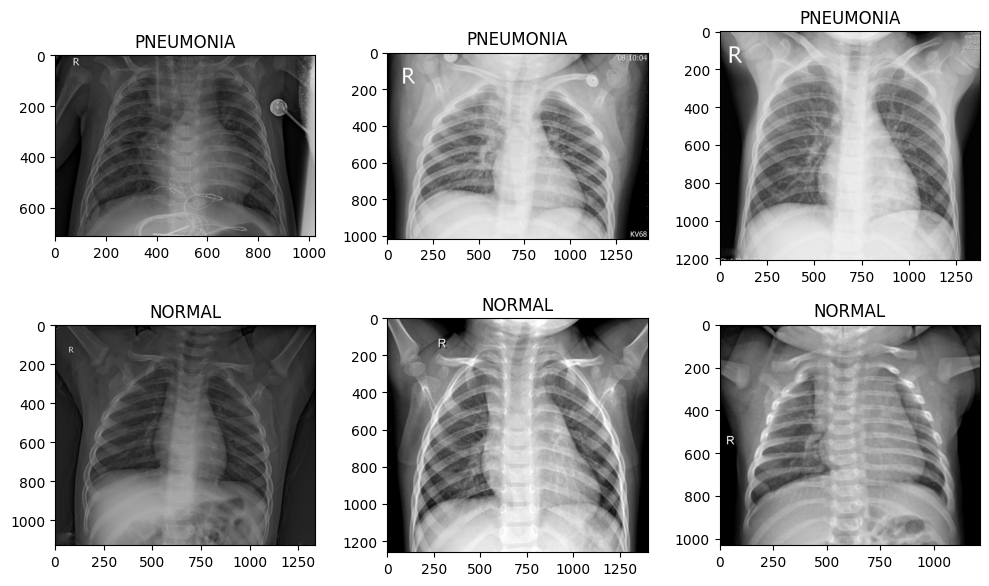

In [5]:
## printing original images
categories = ['PNEUMONIA', 'NORMAL']  
data=data_dir
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
axs = axs.ravel()

for i, category in enumerate(categories):
    folder_path = os.path.join(data, category)
    
    for j, filename in enumerate(os.listdir(folder_path)):
        if j == 3:  
            break
            
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        
        axs[i*3+j].imshow(image)
        axs[i*3+j].set_title(category)
#         print("image-{}".format(i+1))
#         print("Label: ", labels2[i])
#         print("Features: ", features2[2])
#         print("-----------------------------")
        
plt.tight_layout()
plt.show()

after preprocessing

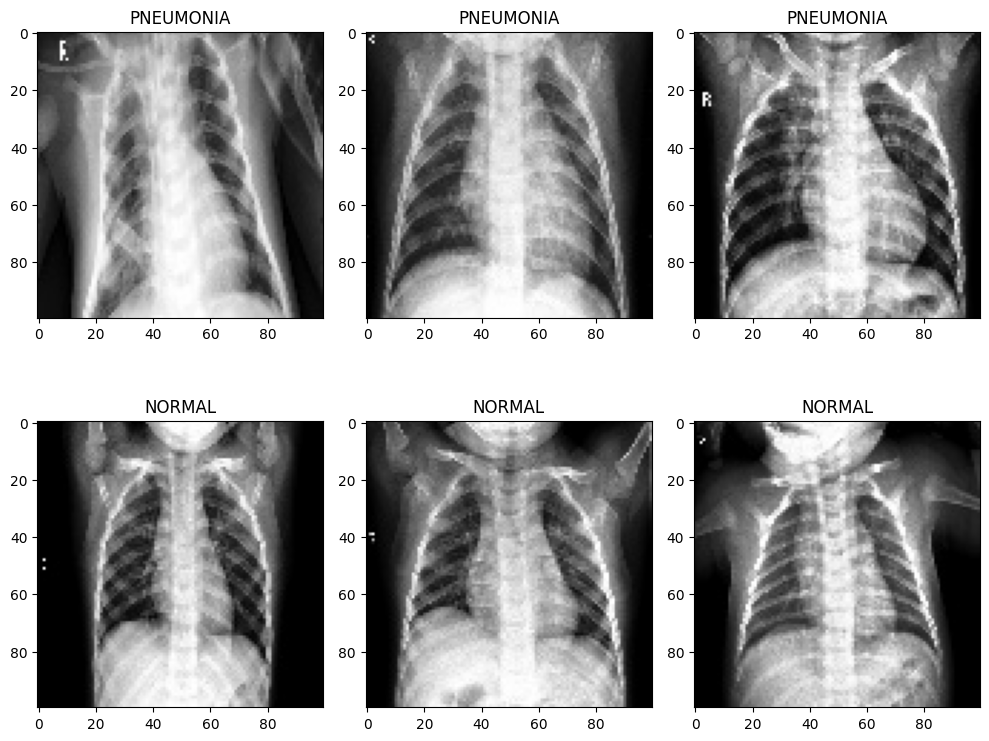

In [6]:
import cv2
import os
import matplotlib.pyplot as plt

pre_img = 'preprocessed_images2' 
categories = ['PNEUMONIA', 'NORMAL']  

fig, axs = plt.subplots(2, 3, figsize=(10, 8))
axs = axs.ravel()

# Loop through each category and display a sample of images
for i, category in enumerate(categories):
    folder_path = os.path.join(pre_img, category)
    
    # Loop through each image in the folder
    for j, filename in enumerate(os.listdir(folder_path)):
        if j == 3:  # Display only the first 3 images in each folder
            break
            
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path) #, cv2.IMREAD_GRAYSCALE  # Load image in grayscale
        
        axs[i*3+j].imshow(image, cmap='gray')
        axs[i*3+j].set_title(category)
        
plt.tight_layout()
plt.show()


# feature extraction v3

ok


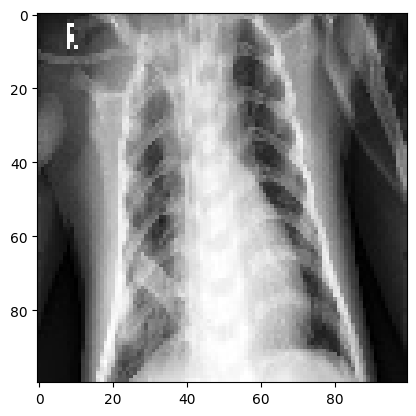

0
ok


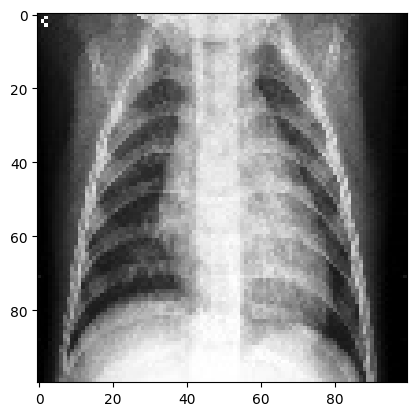

1
ok


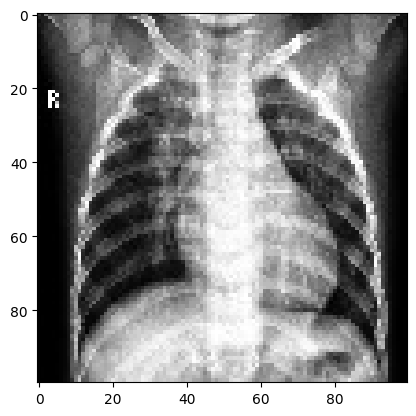

2
ok


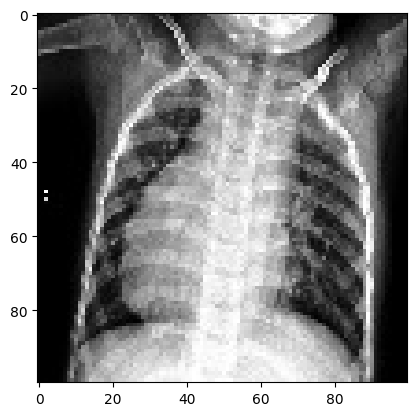

3
ok


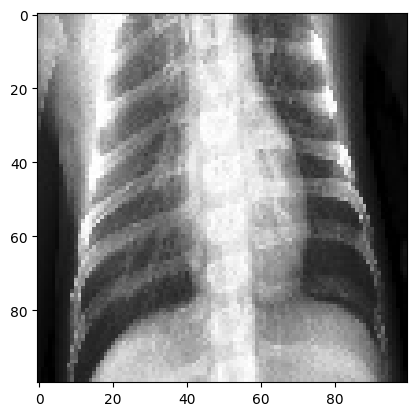

4
ok


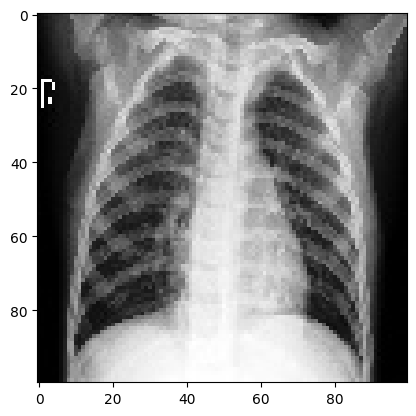

5
ok


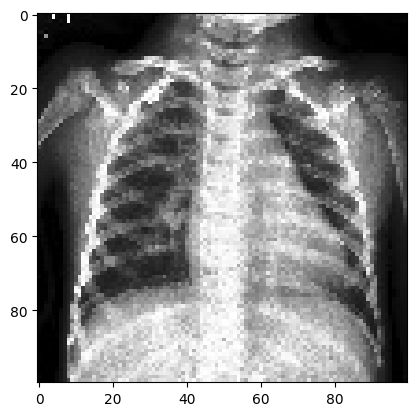

6
ok


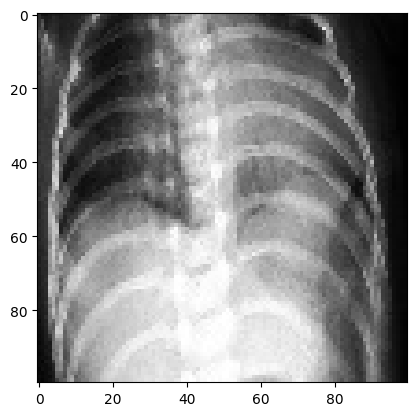

7
ok


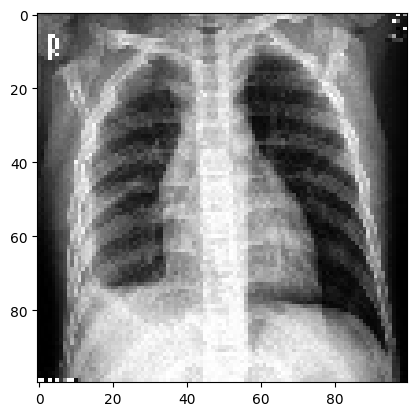

8
ok


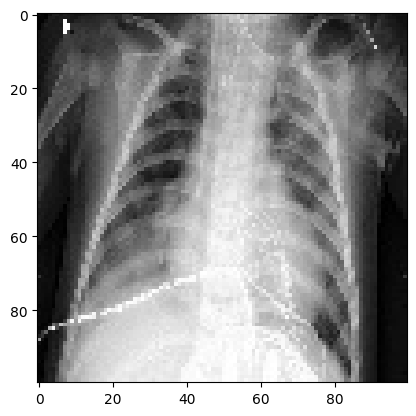

9
5216


In [32]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

from scipy.fftpack import dct

window_size = 4  # Specify the desired window size for the DCT
features_folder_path = 'extracted_features'
features2 = []
labels2 = []

label_dict = {'NORMAL': 0, 'PNEUMONIA': 1}

if not os.path.exists(features_folder_path):
    os.mkdir(features_folder_path)

for folder in os.listdir(preprocessed_folder_path):
    folder_path = os.path.join(preprocessed_folder_path, folder)
    features_category_folder_path = os.path.join(features_folder_path, folder)

    label = label_dict[folder]

    if not os.path.exists(features_category_folder_path):
        os.mkdir(features_category_folder_path)

    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path, 0)  # Read image as grayscale

        if image is not None:
            height, width = image.shape[:2]
            
            # Divide the image into blocks and compute DCT for each block
            features = []
            for i in range(0, height, window_size):
                for j in range(0, width, window_size):
                    block = image[i:i+window_size, j:j+window_size]

                    # Perform DCT on the block
                    dct_block = dct(block, norm='ortho')

                    # Flatten the DCT coefficients of the block and append to features
                    features.extend(dct_block.flatten())

            features = np.array(features)
            features2.append(features)
            labels2.append(label)

            features_path = os.path.join(features_category_folder_path, filename.split('.')[0] + '.npy')
            np.save(features_path, features)

features2 = np.array(features2)
labels2 = np.array(labels2)



image-1
Label:  1
Features:  [70.71067812 -9.89795883 -0.42911072 ...  0.          0.
  0.        ]
-----------------------------
image-2
Label:  1
Features:  [ 94.0452019  -18.2531912   -3.96611618 ...   0.           0.
   0.        ]
-----------------------------
image-3
Label:  1
Features:  [ 2.18142442e+02 -4.03299967e+01 -2.66044642e+01 ...  3.80760351e+00
  1.50000000e+00  4.64272855e-02]
-----------------------------
image-4
Label:  1
Features:  [ 45.60838739 -10.22500299  -2.26327155 ...   0.           0.
   0.        ]
-----------------------------
image-5
Label:  1
Features:  [ 4.51841233e+02  1.84285550e+01 -2.74650187e+01 ...  1.83847361e+01
  2.00000000e+00 -3.84616226e-02]
-----------------------------
image-6
Label:  1
Features:  [102.53048327 -41.94685119  -2.50104055 ...   0.           0.
   0.        ]
-----------------------------
image-1
Label:  1
Features:  [70.71067812 -9.89795883 -0.42911072 ...  0.          0.
  0.        ]
-----------------------------
image-2


IndexError: index 6 is out of bounds for axis 0 with size 6

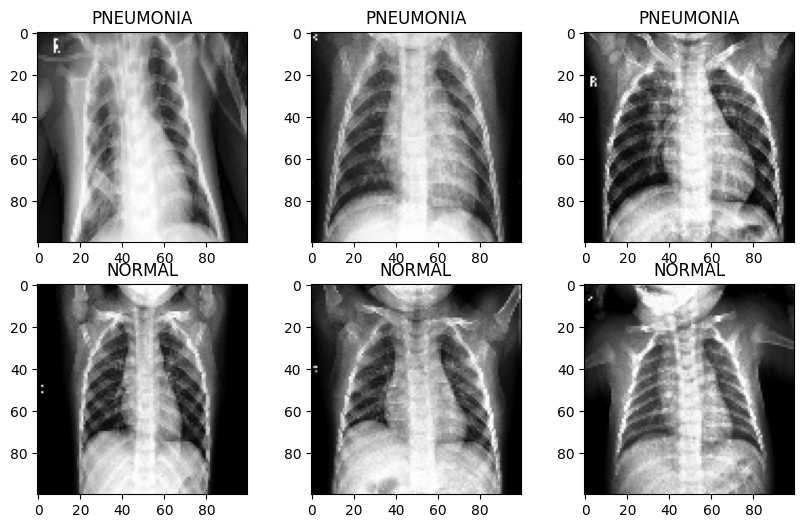

In [14]:
## printing original images
categories = ['PNEUMONIA', 'NORMAL']  
data='preprocessed_images2'
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
axs = axs.ravel()

for i, category in enumerate(categories):
    folder_path = os.path.join(data, category)
    
    for j, filename in enumerate(os.listdir(folder_path)):
        if j == 6:  
            break
            
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        
        axs[i*3+j].imshow(image)
        axs[i*3+j].set_title(category)
        print("image-{}".format(j+1))
        print("Label: ", labels2[j])
        print("Features: ", features2[j])
        print("-----------------------------")
        
plt.tight_layout()
plt.show()

lbp

In [18]:
## data of first three imagei=90
i=0
for i in range(9):
    print("image-{}".format(i+1))
    print("Label: ", labels2[i])
    print("Features: ", features2[i])
    print("-----------------------------")

image-1
Label:  1
Features:  [70.71067812 -9.89795883 -0.42911072 ...  0.          0.
  0.        ]
-----------------------------
image-2
Label:  1
Features:  [ 94.0452019  -18.2531912   -3.96611618 ...   0.           0.
   0.        ]
-----------------------------
image-3
Label:  1
Features:  [ 2.18142442e+02 -4.03299967e+01 -2.66044642e+01 ...  3.80760351e+00
  1.50000000e+00  4.64272855e-02]
-----------------------------
image-4
Label:  1
Features:  [ 45.60838739 -10.22500299  -2.26327155 ...   0.           0.
   0.        ]
-----------------------------
image-5
Label:  1
Features:  [ 4.51841233e+02  1.84285550e+01 -2.74650187e+01 ...  1.83847361e+01
  2.00000000e+00 -3.84616226e-02]
-----------------------------
image-6
Label:  1
Features:  [102.53048327 -41.94685119  -2.50104055 ...   0.           0.
   0.        ]
-----------------------------
image-7
Label:  1
Features:  [ 117.37972568  -21.78752285 -111.13614195 ...   -4.57297038    3.5
   -1.89418635]
-------------------------

[ 0.70710678 -0.5879378   0.         ...  0.          0.
  0.        ]


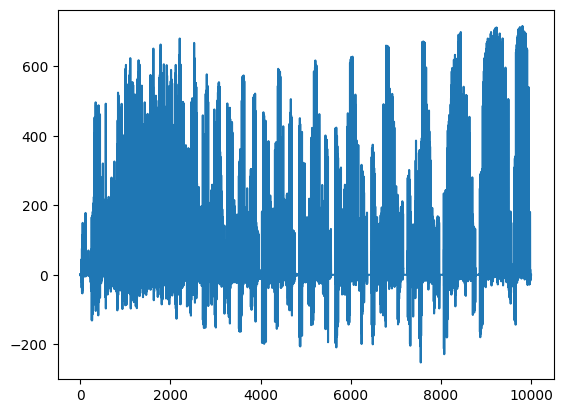

In [19]:
# Assuming you have loaded the features from a file
features = np.load(features_path)

# Print the feature values
print(features)

# Visualize the feature values
plt.plot(features)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features2, labels2, test_size=0.2, random_state=42)

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data (X_train, y_train, X_test, y_test)

# Create a Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


ValueError: Negative values in data passed to MultinomialNB (input X)

In [25]:
import os
import numpy as np
from scipy.stats import norm

class NaiveBayes:
    def __init__(self):
        self.classes = None
        self.class_priors = None
        self.feature_distributions = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_priors = np.zeros(len(self.classes))
        self.feature_distributions = []

        # Calculate class priors
        for i, c in enumerate(self.classes):
            self.class_priors[i] = np.sum(y == c) / len(y)

        # Calculate feature distributions for each class
        for c in self.classes:
            X_c = X[y == c]
            distributions = []
            for feature in range(X.shape[1]):
                feature_values = X_c[:, feature]
                mean = np.mean(feature_values)
                std = np.std(feature_values)
                distribution = norm(mean, std)
                distributions.append(distribution)
            self.feature_distributions.append(distributions)

    def predict(self, X):
        predictions = []
        for x in X:
            posteriors = []
            for i, c in enumerate(self.classes):
                posterior = self.class_priors[i]
                for feature, distribution in enumerate(self.feature_distributions[i]):
                    likelihood = distribution.pdf(x[feature])
                    posterior *= likelihood
                posteriors.append(posterior)
            predictions.append(self.classes[np.argmax(posteriors)])
        return predictions

# Load the preprocessed features
features_folder_path = 'extracted_features'

X = []
y = []

for folder in os.listdir(features_folder_path):
    folder_path = os.path.join(features_folder_path, folder)
    category = 0 if folder == 'NORMAL' else 1
    
    for filename in os.listdir(folder_path):
        features_path = os.path.join(folder_path, filename)
        features = np.load(features_path)
        
        X.append(features)
        y.append(category)

X = np.array(X)
y = np.array(y)

# Train-test split
split_ratio = 0.8
split_idx = int(split_ratio * len(X))

X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Create an instance of NaiveBayes classifier
classifier = NaiveBayes()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)


KeyboardInterrupt: 

GB

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features2, labels2, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Predict labels for the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.896551724137931


In [34]:
accuracy = np.mean(y_pred == y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 89.66%
